In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [43]:
# warnings: 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore")

In [44]:
df = pd.read_csv("./data/202306_202306_연령별인구현황_월간.csv",encoding="ms949")
df.head(1)

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
0,서울특별시 (1100000000),"9,414,093","9,414,093","528,601","742,606","1,376,043","1,426,858","1,433,451","1,490,305","1,312,500","725,930","332,435","43,869","1,495"


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3877 non-null   object
 1   2023년06월_계_총인구수     3877 non-null   object
 2   2023년06월_계_연령구간인구수  3877 non-null   object
 3   2023년06월_계_0~9세     3877 non-null   object
 4   2023년06월_계_10~19세   3877 non-null   object
 5   2023년06월_계_20~29세   3877 non-null   object
 6   2023년06월_계_30~39세   3877 non-null   object
 7   2023년06월_계_40~49세   3877 non-null   object
 8   2023년06월_계_50~59세   3877 non-null   object
 9   2023년06월_계_60~69세   3877 non-null   object
 10  2023년06월_계_70~79세   3877 non-null   object
 11  2023년06월_계_80~89세   3877 non-null   object
 12  2023년06월_계_90~99세   3877 non-null   object
 13  2023년06월_계_100세 이상  3877 non-null   object
dtypes: object(14)
memory usage: 424.2+ KB


In [46]:
# 기술요약통계
df.describe(include=object)

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
count,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877,3877
unique,3877,3615,3615,1968,2263,2473,2498,2627,2830,2751,2121,1426,520,104
top,서울특별시 (1100000000),0,0,30,0,0,0,0,0,0,0,0,63,1
freq,1,17,17,23,18,18,17,17,17,17,17,17,49,831


In [47]:
# 2023년06월_계_총인구수 => 총인구수
# 모든 컬럼명에 "2023년06월_계_" 제거
df.columns = df.columns.str.replace("2023년06월_계_","")
df.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [48]:
# 컬럼 제거 - 총인구수, 연령구간인구수
# columns=[]로 정의하면 axis를 안 써줘도 된다.
df.drop(["총인구수","연령구간인구수"], axis=1, inplace=True)

In [49]:
df.head(2)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),"528,601","742,606","1,376,043","1,426,858","1,433,451","1,490,305","1,312,500","725,930","332,435","43,869","1,495"
1,서울특별시 종로구 (1111000000),"6,110","10,009","21,836","19,367","19,459","24,025","20,556","11,446","6,619",934,36


#### 특정 동 데이터 탐색

In [50]:
df[df["행정구역"] == "서울특별시 종로구 평창동(1111056000)"]

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),"1,037","1,525","2,103","2,080","2,506","3,159","2,748","1,360",815,133,10


In [51]:
df.loc[6]

행정구역       서울특별시 종로구 평창동(1111056000)
0~9세                           1,037
10~19세                         1,525
20~29세                         2,103
30~39세                         2,080
40~49세                         2,506
50~59세                         3,159
60~69세                         2,748
70~79세                         1,360
80~89세                           815
90~99세                           133
100세 이상                           10
Name: 6, dtype: object

In [52]:
# contains()
pyeongchang = df[df["행정구역"].str.contains("평창동")]
pyeongchang

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),"1,037","1,525","2,103","2,080","2,506","3,159","2,748","1,360",815,133,10


In [53]:
pyeongchang.drop(columns=["행정구역"], inplace=True)

In [57]:
pyeongchang = pyeongchang.T
pyeongchang

,6
0~9세,"1,037"
10~19세,"1,525"
20~29세,"2,103"
30~39세,"2,080"
40~49세,"2,506"
50~59세,"3,159"
60~69세,"2,748"
70~79세,"1,360"
80~89세,815
90~99세,133


In [60]:
pyeongchang.columns = ["인구수"]
pyeongchang

,인구수
0~9세,"1,037"
10~19세,"1,525"
20~29세,"2,103"
30~39세,"2,080"
40~49세,"2,506"
50~59세,"3,159"
60~69세,"2,748"
70~79세,"1,360"
80~89세,815
90~99세,133


In [66]:
pyeongchang = pyeongchang.apply(lambda x:x.str.replace(",","").astype("int64"))

In [67]:
pyeongchang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0~9세 to 100세 이상
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인구수     11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


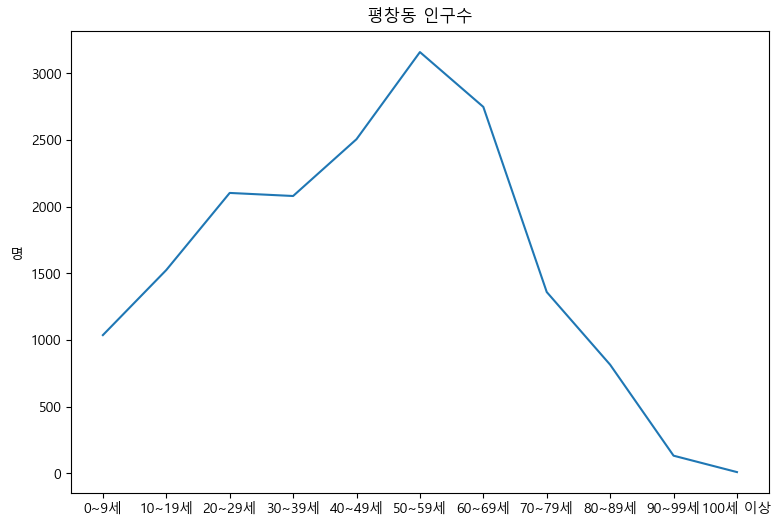

In [69]:
# 평창동 선차트
# 평창동 인구수
plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
plt.plot(pyeongchang.index,pyeongchang["인구수"])

<BarContainer object of 11 artists>

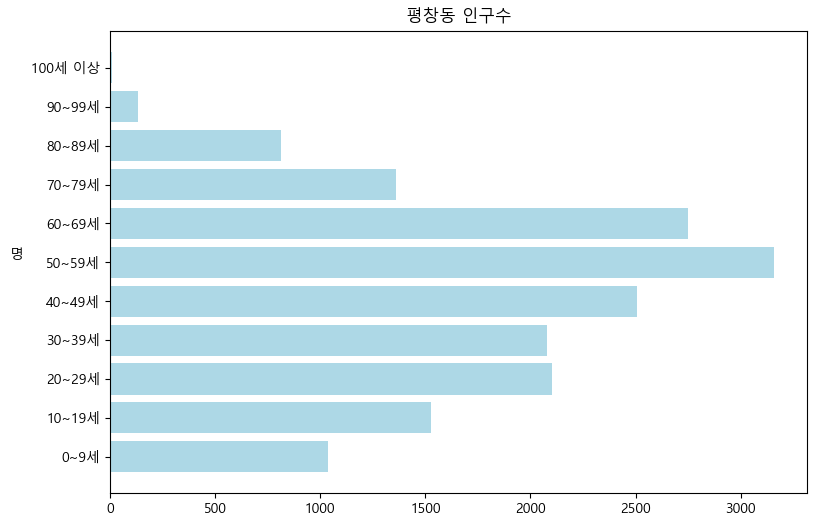

In [71]:
plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
plt.barh(pyeongchang.index,pyeongchang["인구수"], color="lightblue")

In [86]:
dong = input("인구구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해주세요.")

<BarContainer object of 11 artists>

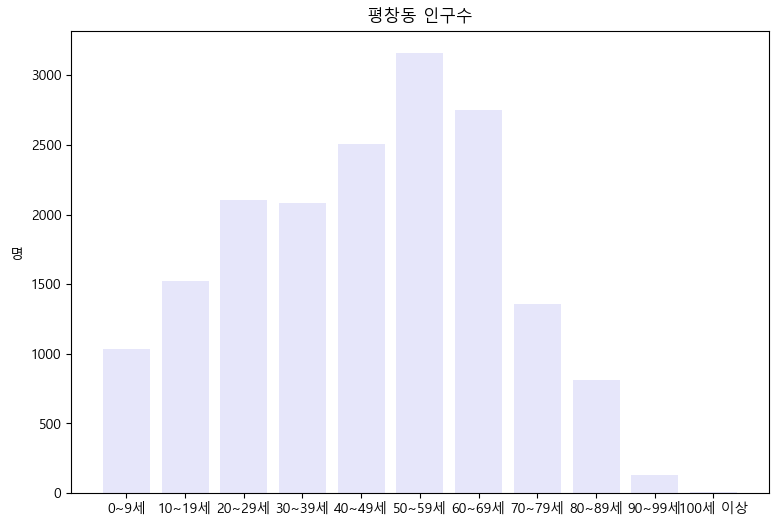

In [96]:
# contains()
result = df[df["행정구역"].str.contains(dong)]
result.drop(columns=["행정구역"], inplace=True)
result = result.apply(lambda x:x.str.replace(",","").astype("int64"))

# 행열바꿈
result = result.T

# 컬럼명 변경
result.columns = ["인구수"]

# 차트 작성
plt.figure(figsize=(9,6))
plt.title(dong+" 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
plt.bar(result.index,result["인구수"], color="lavender")